In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os
from datetime import datetime
from MCForecastTools import MCSimulation
import requests
import pandas_datareader as pdr
%matplotlib inline

In [2]:
# Function to Validate Tickers
def validateTick(tick):
    
    # Try Inputting into Yahoo Stocks
    try:
        pdr.DataReader(f'{tick}','yahoo',date)
    
    # Raise Error if Invalid
    except:
        raise ValueError("Ticker Not Valid.")
        
# Function to Validate Date
def validate(date_text):
    
    # Try Check on Format
    try:
        datetime.strptime(date_text, '%Y-%m-%d')
        
    # Raise Error if Invalid
    except ValueError:
        raise ValueError("Incorrect data format, should be YYYY-MM-DD")

In [3]:
# Set Empty Dictionary
stock_dict = {}

# Set Empty List
stock_list = []

# Pick a Start Date
date = input("Pick a start date for your analysis (YYYY-MM-DD): ")
validate(date)

# While Loop to Pick Stocks
while (True):
    name = input("Add a stock ticker to the list: ").upper()
    validateTick(name)
    stock_dict[name] = date
    stock_list.append(name)
    cont = input("Press 'y' to Add Another Stock, press 'Enter' to exit")
    if cont == "":
        break;

Pick a start date for your analysis (YYYY-MM-DD):  2015-01-01
Add a stock ticker to the list:  AMD
Press 'y' to Add Another Stock, press 'Enter' to exit y
Add a stock ticker to the list:  ADBE
Press 'y' to Add Another Stock, press 'Enter' to exit y
Add a stock ticker to the list:  C
Press 'y' to Add Another Stock, press 'Enter' to exit y
Add a stock ticker to the list:  G
Press 'y' to Add Another Stock, press 'Enter' to exit 


In [4]:
# Function to Create Stocks
def stockCreation(stock_dict, stock_list):
    
    # Create Empty List
    func_list = []

    # For Loop to Iterate through Stocks
    for key, value in stock_dict.items():
        
        # Collect Stock Data
        globals()[key] = pdr.DataReader(f'{key}','yahoo',value)
        
        # Assign Column Values
        globals()[key].columns = [[key, key, key, key, key, key,],["high", "low", "open", "close", "volume", "adj_close"]]

        # Append Each Stock into func_list
        func_list.append(globals()[key])
    
    # Set First Portfolio
    portfolio = func_list[0]
    
    # Create Portfolio Based on Number of Stocks
    if len(func_list) == 2:
        portfolio = portfolio.merge(func_list[1], left_index=True, right_index=True, suffixes=[f'_{stock_list[0]}', f'_{stock_list[1]}'])
    elif len(func_list) > 2:
        portfolio = portfolio.merge(func_list[1], left_index=True, right_index=True)
        for x in range(len(func_list)-2):
            portfolio = portfolio.merge(func_list[x + 2], left_index=True, right_index=True)
            
    # Create Empty List
    portfolio_close = []
    
    # Append Close Values to New List
    for x in range(len(stock_list)):
        portfolio_close.append(portfolio[stock_list[x]][f"adj_close"])
    
    # Create DataFrame from New List
    portfolio_close = pd.DataFrame(portfolio_close)
    
    # Transpose DataFrame
    portfolio_close = portfolio_close.T
    
    # Assign Column Names
    portfolio_close.columns = stock_list
        
    # Return Both DataFrames
    return portfolio, portfolio_close

In [5]:
# Call Function Above to Save Full Portfolio
portfolio = stockCreation(stock_dict, stock_list)[0]

# Show DataFrame
portfolio

AMD                                                        \
                 high        low       open      close    volume  adj_close   
Date                                                                          
2015-01-02   2.670000   2.670000   2.670000   2.670000         0   2.670000   
2015-01-05   2.700000   2.640000   2.670000   2.660000   8878200   2.660000   
2015-01-06   2.660000   2.550000   2.650000   2.630000  13912500   2.630000   
2015-01-07   2.650000   2.540000   2.630000   2.580000  12377600   2.580000   
2015-01-08   2.650000   2.560000   2.590000   2.610000  11136600   2.610000   
...               ...        ...        ...        ...       ...        ...   
2020-12-09  94.699997  89.160004  92.760002  89.830002  52170400  89.830002   
2020-12-10  92.089996  89.029999  89.550003  91.660004  33804400  91.660004   
2020-12-11  92.330002  90.160004  91.540001  91.650002  28368100  91.650002   
2020-12-14  95.410004  91.849998  92.209999  94.779999  47872100  94.779999   
2020-12-15  97.980003  95.449997  95.930000  97.120003  56662871  97.120003   

                  ADBE                                      ...          C  \
                  high         low        open       close  ...       open   
Date                                                        ...              
2015-01-02   73.199997   71.889999   72.699997   72.339996  ...  54.360001   
2015-01-05   72.430000   71.570000   72.209999   71.980003  ...  53.910000   
2015-01-06   72.099998   69.879997   71.949997   70.529999  ...  52.680000   
2015-01-07   71.290001   70.419998   70.769997   71.110001  ...  51.509998   
2015-01-08   73.059998   71.309998   71.400002   72.919998  ...  51.770000   
...                ...         ...         ...         ...  ...        ...   
2020-12-09  497.000000  479.260010  496.029999  483.739990  ...  59.160000   
2020-12-10  488.290009  470.950012  483.739990  476.869995  ...  58.040001   
2020-12-11  478.890015  468.820007  475.980011  475.910004  ...  59.799999   
2020-12-14  488.410004  475.500000  475.609985  486.420013  ...  60.000000   
2020-12-15  489.480011  480.640015  489.049988  482.640015  ...  58.740002   

                                                      G                        \
                close      volume  adj_close       high        low       open   
Date                                                                            
2015-01-02  54.259998  11137800.0  48.313530  19.170000  18.750000  19.040001   
2015-01-05  52.549999  20945400.0  46.790939  18.990000  18.510000  18.770000   
2015-01-06  50.700001  31989300.0  45.143681  19.139999  18.820000  18.850000   
2015-01-07  51.169998  27890800.0  45.562168  19.230000  18.920000  19.200001   
2015-01-08  51.939999  17467200.0  46.247784  19.700001  19.340000  19.430000   
...               ...         ...        ...        ...        ...        ...   
2020-12-09  58.950001  27278200.0  58.950001  41.200001  40.639999  41.000000   
2020-12-10  60.500000  25866600.0  60.500000  41.139999  40.470001  40.770000   
2020-12-11  58.930000  20960000.0  58.930000  40.730000  40.230000  40.549999   
2020-12-14  58.740002  19682000.0  58.740002  41.369999  40.500000  40.660000   
2020-12-15  59.669998  14825817.0  59.669998  41.150002  40.419998  40.830002   

                                             
                close     volume  adj_close  
Date                                         
2015-01-02  18.900000   259300.0  18.199549  
2015-01-05  18.870001   836100.0  18.170660  
2015-01-06  19.090000   827200.0  18.382507  
2015-01-07  19.200001   956500.0  18.488430  
2015-01-08  19.660000   513000.0  18.931385  
...               ...        ...        ...  
2020-12-09  40.950001   819300.0  40.950001  
2020-12-10  40.860001   642700.0  40.860001  
2020-12-11  40.380001  1014500.0  40.380001  
2020-12-14  40.500000   754800.0  40.500000  
2020-12-15  41.150002   732329.0  41.150002  

[1500 rows x 24 columns]

In [6]:
# Call Function Above to Save Portfolio Close Values
portfolio_close = stockCreation(stock_dict, stock_list)[1]

# Show DataFrame
portfolio_close

,AMD,ADBE,C,G
Date,,,,
2015-01-02,2.670000,72.339996,48.313530,18.199549
2015-01-05,2.660000,71.980003,46.790939,18.170660
2015-01-06,2.630000,70.529999,45.143681,18.382507
2015-01-07,2.580000,71.110001,45.562168,18.488430
2015-01-08,2.610000,72.919998,46.247784,18.931385
...,...,...,...,...
2020-12-09,89.830002,483.739990,58.950001,40.950001
2020-12-10,91.660004,476.869995,60.500000,40.860001
2020-12-11,91.650002,475.910004,58.930000,40.380001


# Monte Carlo Simulation

## Definition: Computational algorithms that rely on repeated random sampling to obtain numerical results. 

### Purpose: The underlying concept is to use randomness to solve problems that might be deterministic in principle.

In [7]:
# Select Number of Years for Monte Carlo Simulation
num_years = int(input("How many years do you want to run the Monte Carlo Simulation for?"))

# Select Number of Simulations for Monte Carlo Simulation
sims = int(input("How many simulations would you like to run?"))

# Create Monte Carlo Object
MC = MCSimulation(
        portfolio_data = portfolio,
        weights = np.full((1,len(portfolio_close.columns)), 1/len(portfolio_close.columns))[0].tolist(),
        num_simulation = sims,
        num_trading_days = 252*num_years
    )

# Run Monte Carlo Simulation
cumu_return = MC.calc_cumulative_return()

How many years do you want to run the Monte Carlo Simulation for? 10
How many simulations would you like to run? 500


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

### Each line represents one simulation of possible outcomes of this portfolio.

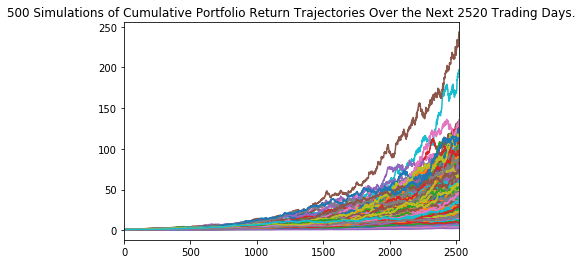

In [8]:
# Create Plot Simulation
line_plot = MC.plot_simulation();

# Save Plot Simulation
line_plot.figure.savefig(f"Images/MC_plot_simulation.png", bbox_inches='tight')

#### Before moving on: Is a high volatile or low volatile outcome more likely?
 
### This graph represents the distribution of returns across all the simulations.

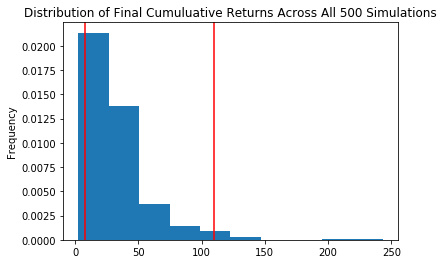

In [9]:
# Create Plot Distribution
plot_dist = MC.plot_distribution();

# Save Plot Distribution
plot_dist.figure.savefig(f"Images/MC_plot_distribution.png", bbox_inches='tight')

#### Does the distribution shown above match expectations to your previous answer of volatility?

In [10]:
# Create Cumulative Return Table
tbl = MC.summarize_cumulative_return()

# Select Initial Investment
initial_investment = int(input("Input the amount of money you'd like to forecast in this analysis: $"))

# Set Lower Confidence Interval
ci_lower = round(tbl[8]*initial_investment,2)

# Set Upper Confidence Interval
ci_upper = round(tbl[9]*initial_investment,2)

# Print Results
print(f"""

There is a 95% chance that an initial investment of ${initial_investment} in the portfolio
over the next {num_years} years will end within in the range of ${ci_lower} and ${ci_upper}""")

Input the amount of money you'd like to forecast in this analysis: $ 1000




There is a 95% chance that an initial investment of $1000 in the portfolio
over the next 10 years will end within in the range of $8109.84 and $109877.73


### These projections are based on the lower and upper confidence intervals.

# Rolling Statistics

## Definition: Looking at rolling statistics gives performance results that are smoothed over defined periods throughout its history. 

### Purpose: To create a more accurate picture than a single snapshot of one period.

### Taking the 30 day rolling average smoothes the graphs and makes it easier to see overall trends. Based on the rolling average, would you change your previous answers?

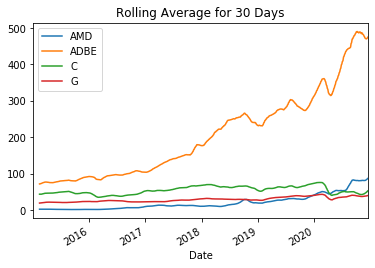

In [11]:
# Find Rolling Mean
rollingmean = portfolio_close.rolling(window=30).mean()

# Plot Rolling Mean
rollingmeanplot = rollingmean.plot(title='Rolling Average for 30 Days');

# Save Figure
rollingmeanplot.figure.savefig(f"Images/rollingmeansplot.png", bbox_inches='tight')

### The Standard Deviation (STD) is a measure of the volatility of a stock.  It can be calculated as a single statistic for an entire dataset.  The higher the STD, the more volatile a stock.

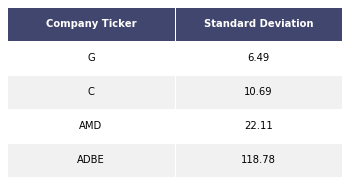

In [12]:
# Calculate STD
overallstd = round(portfolio_close.std().sort_values(),2)

# Create DataFrame
overallstd = pd.DataFrame(overallstd)

# Reset Index
overallstd = overallstd.reset_index()

# Assign Column Names
overallstd.columns = ["Company Ticker", "Standard Deviation"]

# Function to Convert DataFrame as Image
def render_table(data, col_width=3.0, row_height=0.625, font_size=10,
                     header_color='#40466E', row_colors=['#F1F1F2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([3.0, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')
    table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, cellLoc='center', **kwargs)
    table.auto_set_font_size(False)
    table.set_fontsize(font_size)
    for k, cell in table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax.get_figure(), ax

# Call Function to Convert DataFrame
fig,ax = render_table(overallstd, header_columns=0, col_width=2.0)

# Save STD Figure
fig.savefig("Images/std.png")

#### Based on this statistic, what can you say about the volatility of your stocks?

### The Rolling STD looks at changes in volatility over time.

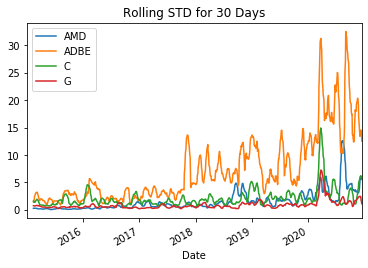

In [13]:
# Find Rolling STD for 30 Days
rollingstd = portfolio_close.rolling(window=30).std()

# Plot Rolling STD
rollingstdplot = rollingstd.plot(title='Rolling STD for 30 Days');

# Save Figure
rollingstdplot.figure.savefig(f"Images/rollingstdplot.png", bbox_inches='tight')

#### Based on this plot, how would you describe the volatility of your stocks?  Are some more volatile than others?  Do they have periods of higher and lower volatility?  What could influence these?

# Daily Return

## Looking at the daily returns of stocks helps to see daily performance comparisons. 

### Purpose: To check a stock's performance we look at the historical prices in time. However; in order to understand its performance, there should be a comparison with other company stocks or general market trends.

In [14]:
# Function to Find Company Name from Ticker
def get_symbol(symbol):
    
    # URL to Yahoo Stocks
    url = "http://d.yimg.com/autoc.finance.yahoo.com/autoc?query={}&region=1&lang=en".format(symbol)
    
    # Get JSON Request
    result = requests.get(url).json()
    
    # Save Result for Each Company
    for x in result['ResultSet']['Result']:
        if x['symbol'] == symbol:
            return x['name']

This graph shows the daily percent changes of:
Advanced Micro Devices, Inc.
Adobe Inc.
Citigroup Inc.
Genpact Limited


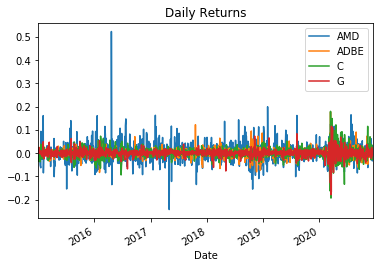

In [15]:
# Print Company Names
print(f"This graph shows the daily percent changes of:")
for x in range(len(stock_list)):
    print(f"{get_symbol(stock_list[x])}")

# Find Daily Returns
stock_performance = portfolio_close.pct_change().dropna()

# Plot Daily Returns
stock_performance_plt = stock_performance.plot.line(title = "Daily Returns")

# Save Figure
stock_performance_plt.figure.savefig(f"Images/daily_returns.png", bbox_inches='tight')

# Show Plot
stock_performance_plt;

#### What can you see and infer from the daily returns graph? 

# Cumulative Return

## Definition: A cumulative return on an investment is the aggregate amount that the investment has gained or lost over time, in a time period. 

### Purpose: Looking at the cumulative return of stocks helps to see general performance comparison in a timespan.

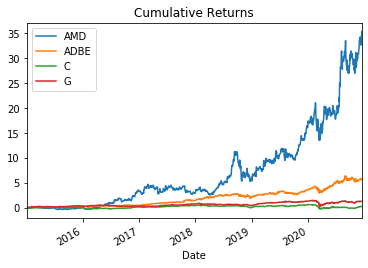

In [16]:
# Create Cumulative Return Function
def CumulativeReturn(daily_returns):
    cumu_return = (1 + daily_returns).cumprod() - 1
    return cumu_return

# Apply Cumulative Return Function
stock_performance_cum = stock_performance.apply(CumulativeReturn)

# Plot Cumulative Return
stock_performance_cum_plt = stock_performance_cum.plot.line(title="Cumulative Returns")

# Save Figure
stock_performance_cum_plt.figure.savefig(f"Images/cumulative_returns.png", bbox_inches='tight')

# Show Plot
stock_performance_cum_plt;

#### What can you see and infer from the cumulative returns graph? 

# Exponentially Weighted Moving Average (EWMA)

## Definition: A view of the average price (open, close, mean) of a stock that gives more weight to the more recent values of the asset.  

### Purpose: The EWMA of a stock can be used as a condfidence indiacator, meaning that a strong but declining stock should have a hard time moving below the EWMA. EWMA can help you to determine what actions to take with an asset depending on its relative position to the close price. 

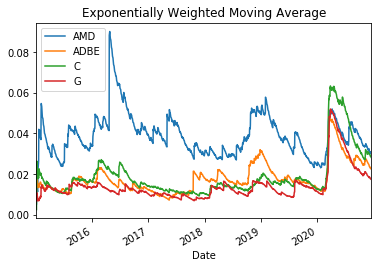

In [17]:
# # Calculate Percent Change
ewma = portfolio_close.pct_change()

# Drop Nulls
ewma = ewma.dropna()

# Calculate Rolling Window using the Exponentially Weighted Moving Average.
ewma = ewma.ewm(halflife=30).std()

# ewma = ewma.merge(portfolio_close, left_on='Date', right_on='Date')

# Plot Results
ewma_plot = ewma.plot(title="Exponentially Weighted Moving Average");

# Save Figure
ewma_plot.figure.savefig(f"Images/ewma.png", bbox_inches='tight')

#### Using Exponentially Weighted Moving Average with overlapping closing prices, what would be your action for the assets in the portfolio you created? 

# Risk Analysis

## Definition: Looking at individual assets, risk and return can be directly correlated. Often as risk increases the opportunity for a large return will also increase, but also a large loss. Looking at an entire portfolio a more risk adverse portfolio will be diverse and have stocks or assets that do not directly correlate with each other. 

### Purpose: Risk Analysis is a good tool to weigh the risk versus return for an entire portfolio or a single asset or security. 

In [18]:
# Assign Weights
weights = np.full((1,len(portfolio_close.columns)), 1/len(portfolio_close.columns))[0].tolist()

#Calculate the Daily Returns of Portfolio
portfolio_returns = portfolio_close.pct_change()

# Drop NA's
portfolio_returns = portfolio_returns.dropna().copy()

# Show Portfolio
portfolio_returns.head(10)

,AMD,ADBE,C,G
Date,,,,
2015-01-05,-0.003745,-0.004976,-0.031515,-0.001587
2015-01-06,-0.011278,-0.020145,-0.035205,0.011659
2015-01-07,-0.019011,0.008223,0.009270,0.005762
2015-01-08,0.011628,0.025453,0.015048,0.023958
2015-01-09,0.007663,-0.014811,-0.022333,0.002035
2015-01-12,0.000000,-0.010022,-0.007877,0.012690
2015-01-13,0.011407,-0.007452,-0.007146,0.004010
2015-01-14,-0.011278,-0.008500,-0.019392,0.000499
2015-01-15,-0.041825,0.004286,-0.037105,0.007485


In [19]:
#Calculate the Average Return for Each Stock
portfolio_returns_avg_rtn = portfolio_returns.mean()

# Show Average Returns
portfolio_returns_avg_rtn

AMD     0.003184
ADBE    0.001458
C       0.000395
G       0.000683
dtype: float64

In [20]:
# Assign Allocated Daily Returns
allocated_daily_returns = (weights * portfolio_returns_avg_rtn)

# Take Sum of Returns
portfolio_return_pct = np.sum(allocated_daily_returns)

# Print Analysis
print(f"""
The average daily percent return of the portfolio is {round(portfolio_return_pct*100,2)}%""")


The average daily percent return of the portfolio is 0.14%


In [21]:
# #Add Daily Returns to DataFrame 
portfolio_returns['portfolio_daily_returns'] = portfolio_returns.dot(weights)

# #Calculate Cumulative Returns
Cumulative_returns_daily = (1+portfolio_returns).cumprod()

In [22]:
# Assign Sum of Returns
returns_sum = Cumulative_returns_daily['portfolio_daily_returns'].sum()

# Assign Portfolio
covariance_portfolio = portfolio_returns.iloc[:,:-1]

# Take Covariance of the Portfolio
covariance_portfolio = (covariance_portfolio.cov())*252

#Calculate Variance and Risk
portfolio_variance = np.dot(weights,np.dot(covariance_portfolio, weights))

#Standard Deviation (Risk of Portfolio)
portfolio_risk = np.sqrt(portfolio_variance)

# Print Analysis
print(f"""This portfolio has a return of {round(returns_sum - 100,2)}% 
and a risk of {round(portfolio_risk *100, 2)}%.""")

This portfolio has a return of 4103.04% 
and a risk of 29.15%.


### Knowing the risk and return of this portfolio, how would you optimize it or change it to reduce risk or increase return? 

In [23]:
#Calculate Annual Volatility
ann_volatility = portfolio_close.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))

# Show Results
for x in range(len(ann_volatility)):
    
    print(f"The Annual Volatility for {get_symbol(stock_list[x])} is {round(ann_volatility[x],2)}")

The Annual Volatility for Advanced Micro Devices, Inc. is 0.62
The Annual Volatility for Adobe Inc. is 0.31
The Annual Volatility for Citigroup Inc. is 0.36
The Annual Volatility for Genpact Limited is 0.26


In [24]:
#Calculate Portfolio Variance and volatility
portfolio_variance = np.dot(weights,np.dot(covariance_portfolio, weights))

#Calculate Portfolio Volatility
portfolio_volatility = np.sqrt(portfolio_variance)

In [25]:
#Calculate Annual and Expected Returns
ann_returns = portfolio_close.resample('Y').last().pct_change().mean()

In [26]:
#Create Table to Display Returns and Volatility
ret_vol_df = pd.concat([ann_returns, ann_volatility], axis=1)

# Rename Columns
ret_vol_df.columns = ['Returns', 'Volatility']

# Show DataFrame
ret_vol_df

,Returns,Volatility
AMD,1.251101,0.622057
ADBE,0.402061,0.308693
C,0.099937,0.357537
G,0.142195,0.264815


### To optimize we need to run a loop that will randomly assign weights to each asset in our portfolio and calculate a new volatility. we will run the loop 10000 times 

In [28]:
# Create Empty List for Portfolio Returns
portfolio_ret = [] 

# Create Empty List for Portfolio Volatility
portfolio_vol = [] 

# Create Empty List for Asset Weights
portfolio_weights = [] 

# Assign Number of Assets
num_assets = len(portfolio_close.columns)

# Assign Number of Portfolios
num_portfolios = 10000

# For each Portfolio
for portfolio in range(num_portfolios):
    
    # Assign New Weights
    new_weights = np.random.random(num_assets)
    
    # Divide New Weights by the Sum
    new_weights = new_weights/np.sum(new_weights)
    
    # Add Weights to Empty Weight List
    portfolio_weights.append(new_weights)
    
    # Take Dot Product
    new_returns = np.dot(new_weights, ann_returns) 
    
    # Append Dot Product to Empty Returns List
    portfolio_ret.append(new_returns)
    
    # Take New Cariance
    new_var = covariance_portfolio.mul(new_weights, axis=0).mul(new_weights, axis=1).sum().sum()
    
    # Take Square Root
    sd = np.sqrt(new_var)
    
    # Find Annual SD
    ann_sd = sd*np.sqrt(250) 
    
    # Append Annual SD to Portfolio
    portfolio_vol.append(ann_sd)
    
    # Create Port Return & Port Volatility Dictionary
    data = {'Portfolio Returns':portfolio_ret, 'Portfolio Volatility':portfolio_vol}

# For List to Create DataFrame
for counter, symbol in enumerate(portfolio_close.columns.tolist()):
    
    # Add Each Weight
    data[symbol+' weight'] = [w[counter] for w in portfolio_weights]
    
    # Save as DataFrame
    portfolios  = pd.DataFrame(data)
    
# Show Portfolio
portfolios 

,Portfolio Returns,Portfolio Volatility,AMD weight,ADBE weight,C weight,G weight
0,0.413683,4.209263,0.114494,0.564214,0.049564,0.271729
1,0.930891,7.554513,0.695893,0.080406,0.091784,0.131917
2,0.383087,4.405123,0.115894,0.485875,0.328581,0.069650
3,0.505194,4.922545,0.312581,0.108809,0.281583,0.297028
4,0.504470,4.980482,0.297347,0.183517,0.358392,0.160744
...,...,...,...,...,...,...
9995,0.415599,4.637722,0.226597,0.147899,0.385827,0.239677
9996,0.351285,4.751182,0.150291,0.254887,0.563331,0.031491
9997,0.861954,7.289851,0.649030,0.042074,0.257666,0.051230
9998,0.261396,4.674654,0.093610,0.160399,0.622032,0.123959


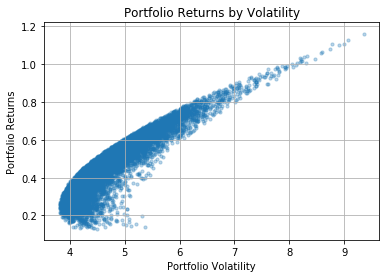

In [29]:
# Plot Returns by Volatility
portfolio_scatter = portfolios.plot.scatter(x='Portfolio Volatility', y='Portfolio Returns', title='Portfolio Returns by Volatility', marker='o', s=10, alpha=0.3, grid=True);

# Save Figure
portfolio_scatter.figure.savefig(f"Images/portfolio_scatter.png", bbox_inches='tight')

#### Does returns and volatility have a positive or negative correlation?

# Sharpe Ratios

## Definition: average return earned beyond the risk-free rate per unit of volatility, the measure of the price fluctuations of an asset. The greater the value of the Sharpe ratio, the more attractive the risk-adjusted return.

### Purpose: The ratio describes the compensation an investor will receive for the extra volatility endured when holding a riskier asset.

In [30]:
# Assign Sharpe Ratio Input
sharpe_input = portfolio_close.pct_change().dropna()

# Calculate Annualized Sharpe Ratios
sharpe_ratios = (sharpe_input.mean()*252) / (sharpe_input.std()*np.sqrt(252))

# Show results
for x in range(len(sharpe_ratios)):
    
    # Print Sharpe Ratios
    print(f"The Sharpe Ratio of {get_symbol(stock_list[x])} is {round(sharpe_ratios[x],2)}")

The Sharpe Ratio of Advanced Micro Devices, Inc. is 1.26
The Sharpe Ratio of Adobe Inc. is 1.18
The Sharpe Ratio of Citigroup Inc. is 0.28
The Sharpe Ratio of Genpact Limited is 0.66


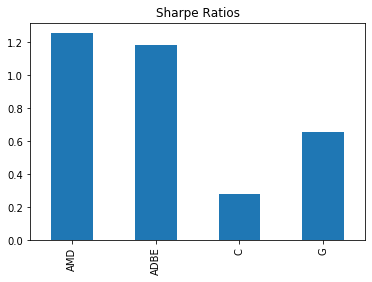

In [31]:
# Visualize Sharpe Ratios as a Bar Plot
sharpe_ratios_plot = sharpe_ratios.plot(kind="bar", title="Sharpe Ratios");

# Save Figure
sharpe_ratios_plot.figure.savefig(f"Images/sharpe_ratios.png", bbox_inches='tight')

#### Based on Sharpe Ratios, which stock is the most volatile?